In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('sensor_3.csv')

In [3]:
def show_features(df, features, units=None):
    try:
        # To avoid SettingWithCopyWarning
        sensor_df = df.copy()

        # Convert the 'timestamp_tz' column to datetime format
        sensor_df['timestamp_tz'] = pd.to_datetime(sensor_df['timestamp_tz'], errors='coerce')

    except Exception as e:
        print(f"Error converting datetime: {str(e)}")
        return

    try:
        # Drop rows with missing 'timestamp_tz' values
        sensor_df = sensor_df.dropna(subset=['timestamp_tz'])

    except Exception as e:
        print(f"Error dropping rows: {str(e)}")
        return

    try:
        sensor_df = sensor_df.sort_values(by='timestamp_tz')

        # Create an array of dates at 1:00 AM, 7:00 AM, 1:00 PM, and 7:00 PM each day
        date_ranges = pd.date_range(sensor_df['timestamp_tz'].dt.floor('D').min(), sensor_df['timestamp_tz'].dt.floor('D').max(), freq='D')
        x_ticks = np.concatenate([
            date_ranges + pd.DateOffset(hours=1),
            date_ranges + pd.DateOffset(hours=7),
            date_ranges + pd.DateOffset(hours=13),
            date_ranges + pd.DateOffset(hours=19),
        ])

        # Plot the selected features against time
        for feature in features:
            fig, ax = plt.subplots(figsize=(12, 4))
            ax.set_xticks(x_ticks)
            ax.xaxis.set_major_formatter(mdates.DateFormatter("%I %p"))

            # Add units to the Y-axis label if specified
            if units and feature in units:
                plt.ylabel(f"{feature} ({units[feature]})")
            else:
                plt.ylabel(feature)

            plt.plot(sensor_df['timestamp_tz'], sensor_df[feature])
            plt.title(f'{feature} vs. Time')
            plt.xlabel('Time')
            plt.xticks(rotation=45)

            # Add vertical lines at 1 AM each day (colored green)
            for date in date_ranges:
                plt.axvline(date + pd.DateOffset(hours=1), color='green', linestyle='--', linewidth=1)

            plt.grid(True)
            plt.show()
    except Exception as e:
        print(f"Error plotting data: {str(e)}")


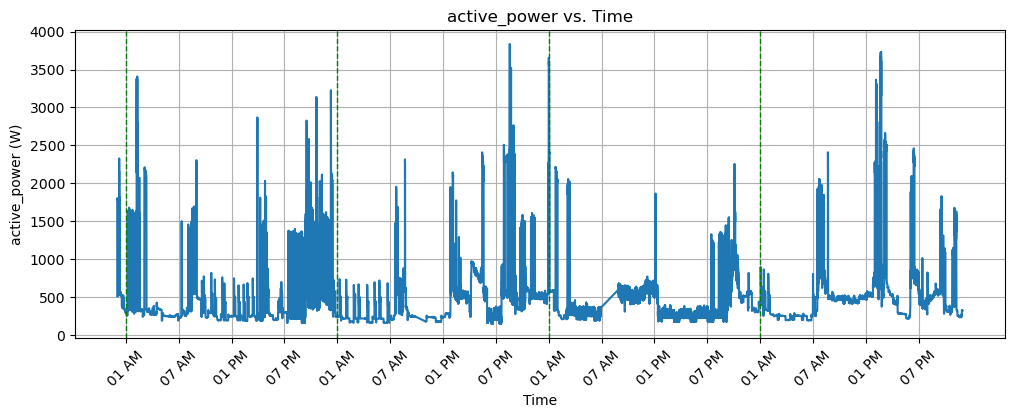

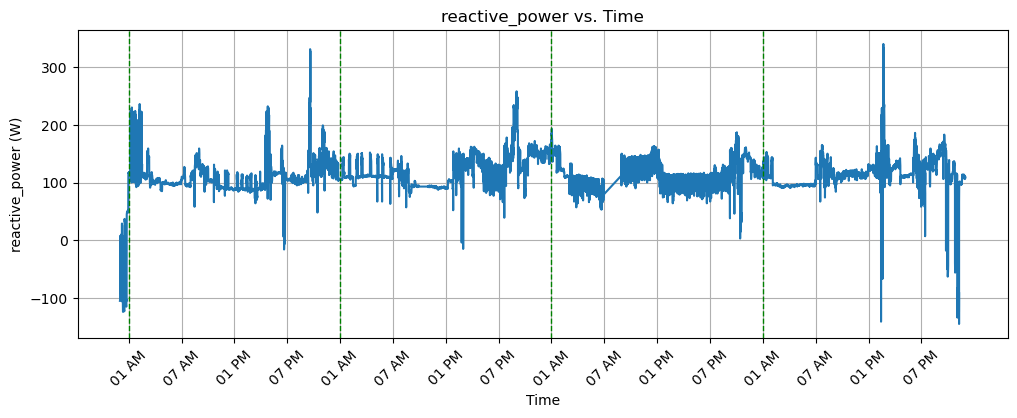

In [4]:

features = ['active_power', 'reactive_power']
units = {'active_power': 'W','reactive_power': 'W'}

show_features(df, features, units)
